In [1]:
from astropy import units as u

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import pandas as pd

In [3]:
def m(size):
    # generate float number between 1 and 3 with size len(m)
    return np.random.uniform(1,3,size) * u.M_sun

In [4]:
# Generating dataset
size = 100000

m1_lst = []
m2_lst = []

while len(m1_lst) < size:
    m1 = m(1)
    m2 = m(1)
    # if m1 > m2:
    m1_lst.append(m1)
    m2_lst.append(m2)
        
m1 = np.array(m1_lst) * u.M_sun
m2 = np.array(m2_lst) * u.M_sun

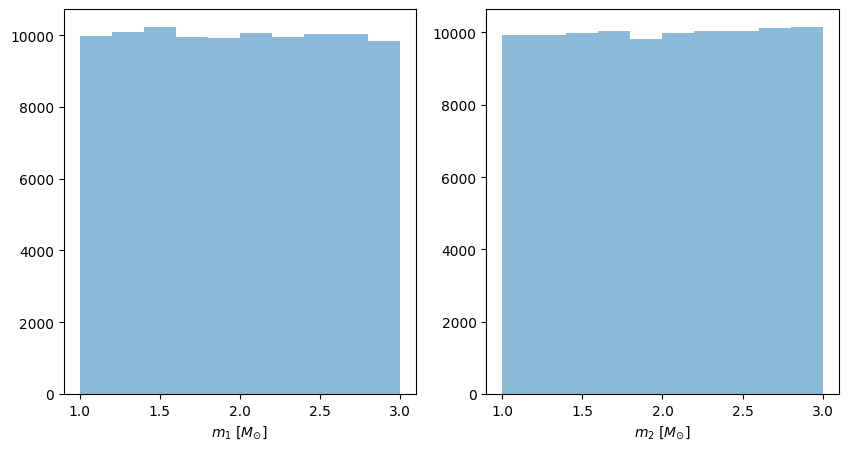

In [5]:
# two plots side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(m1, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_1$ $[M_{\odot}]$')
plt.subplot(1,2,2)
plt.hist(m2, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_2$ $[M_{\odot}]$')
plt.savefig('histogram_BNS.png')

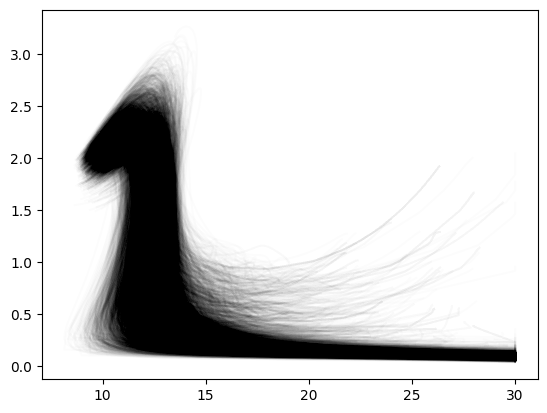

In [6]:
import h5py
infile = h5py.File('LCEHL_EOS_posterior_samples_PSR+GW+NICER.h5', 'r')

m_grid = np.linspace(0.1, 3, 100000)
r_mat = np.zeros((len(infile['ns']),len(m_grid)))

for i in range(len(infile['ns'])):
    plt.plot(infile['ns']['eos_{0}'.format(i)]['R'],infile['ns']['eos_{0}'.format(i)]['M'],c='k',alpha=0.01)
    r_mat[i] = np.interp(m_grid,infile['ns']['eos_{0}'.format(i)]['M'],infile['ns']['eos_{0}'.format(i)]['R'])
plt.show()

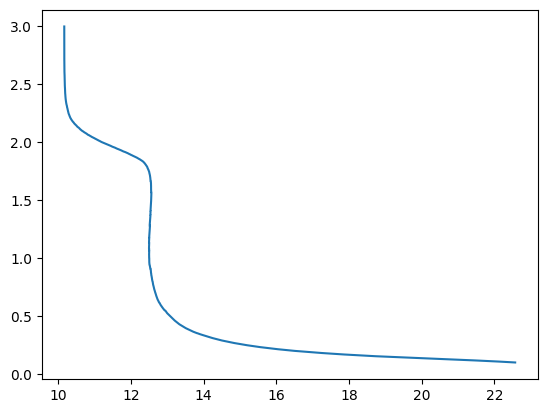

In [7]:
r_arr = m_grid.copy()
for i in range(len(m_grid)):
    r_arr[i] = np.average(r_mat[:,i])

plt.plot(r_arr, m_grid)
r1_int = np.interp(m1.value, m_grid, r_arr) * u.km
r2_int = np.interp(m2.value, m_grid, r_arr) * u.km

Fraction of BNS systems with f_contact < f_ISCO: 0.000000


/var/folders/hr/fxn20ncj0qq2_mtm8k66bl7r0000gn/T/ipykernel_3281/830199210.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


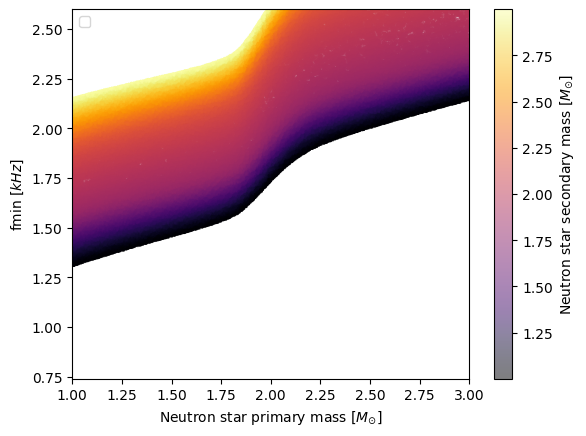

In [8]:
from astropy.constants import G, c

# a_val = 12.56 # median from arXiv:2106.05313 PSR+GW+NICER
# a = a_val * u.km
# r_avg = (r1_int + r2_int)/2
# a = r_avg
# num = (4*np.pi**2) * (2.*a)**3
# dem = G*(m1+m2)
# P = np.sqrt(num/dem)
# f_kepler = (1/P).to(u.Hz) # this is an orbital frequency (GW frequency would be double)
# f_contact = 2*f_kepler
# m_avg = (m1+m2)/2
# 
# lower = np.percentile(f_kepler, 5)
# upper = np.percentile(f_kepler, 95)
# median = np.percentile(f_kepler, 50)
# mean = np.mean(f_kepler)


f_ISCO = 1/(6**3/2) * 1/np.pi * 1/(m1+m2) * (c**3)/G

f_contact = (np.sqrt((m1+m2)/((r1_int+r2_int)**3) * G/(np.pi**2))).to(u.Hz) 

counter = 0

for i in range(len(f_contact)):
    if f_contact[i] < f_ISCO[i]:
        counter += 1

print(f"Fraction of BNS systems with f_contact < f_ISCO: {counter/len(f_contact):3f}")

f_min = np.minimum(f_ISCO.value, f_contact.value) * u.Hz

plt.figure()
plt.scatter(m1, f_min.to(u.kHz), alpha=0.5, s=10, marker = "1", c = m2.value, cmap = 'inferno')
plt.scatter(m2, f_min.to(u.kHz), alpha=0.5, s=10, marker = "1", c = m1.value, cmap = 'inferno')
plt.colorbar(label = r'Neutron star secondary mass $[M_{\odot}]$')
# strongest resonance occurs when f-mode frequency is twice orbital frequency, cf. arXiv:astro-ph/9812116
# so check if f-mode frequency is ever below twice orbital frequency at contact (which happens to be equal to the GW contact frequency)
plt.ylim(0.74, 2.6)
plt.xlim(1, 3)
plt.xlabel(r'Neutron star primary mass $[M_{\odot}]$')
plt.ylabel(r'fmin $[kHz]$')
plt.legend()
plt.savefig('contact_BNS.png')

In [9]:
df = pd.DataFrame({"m1": m1.value.squeeze(), "m2": m2.value.squeeze()})
# df['f_kepler'] = f_kepler.value.squeeze()
df['f_contact'] = (f_min).value.squeeze()
df.to_csv('contact_BNS.csv')

In [10]:
df

,m1,m2,f_contact
0,1.725941,1.820404,1758.463023
1,2.792430,2.252055,2816.206099
2,2.844377,2.490261,2917.646559
3,2.445289,2.593078,2832.684769
4,1.657762,1.284601,1584.543769
...,...,...,...
99995,1.547885,2.528786,2159.029084
99996,1.250923,2.622341,2111.576326
99997,1.783700,1.271376,1623.875759
99998,2.405265,1.215101,2038.987294
